In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
data = pd.read_csv('STS-121AscentData.csv')
data

,Time,Altitude,Velocity,Acceleration
0,0,-8,0,2.45
1,20,1244,139,18.62
2,40,5377,298,16.37
3,60,11617,433,19.40
4,80,19872,685,24.50
5,100,31412,1026,24.01
6,120,44726,1279,8.72
7,140,57396,1373,9.70
8,160,67893,1490,10.19
9,180,77485,1634,10.68


In [116]:
def Plotpattern(xoriginal,yoriginal,xpoints,ypoints,xInterpolation,yInterpolation):
    fig = plt.figure(figsize = (8,7))
    plt.plot(xInterpolation, yInterpolation, 'b')
    plt.plot(xoriginal, yoriginal, 'ro')
    plt.plot(xpoints, ypoints, 'ms')
    plt.title('Data')
    plt.grid()
    plt.xlabel('Tempo (s)')
    plt.ylabel('Velocidade (m/s)')
    plt.show()


Index(['Time', 'Altitude', 'Velocity', 'Acceleration'], dtype='object')
[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340
 360 380 400 420 440 460 480 500 520]


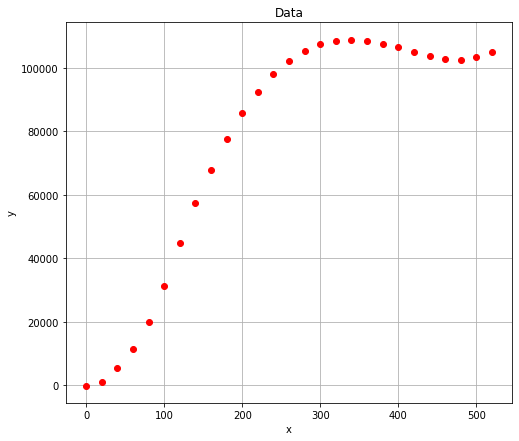

In [117]:
fig = plt.figure(figsize = (8,7))

print(data.columns)

y = data['Altitude'].to_list()
x = np.arange(0, 540, 20)
print(x)
plt.plot( x, y, 'ro')
plt.title('Data')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Lagrange

In [118]:
def P(xt,x,i):
    result = []
    for j in range(len(x)):
        if(j != i):
            result.append((xt-x[j])/(x[i]-x[j]))
    return np.prod(result)
         

def Lagrange(x,y,xt):
    result = []
    for i in range(len(x)):
        result.append(y[i]*P(xt,x,i))
    return np.sum(result)

In [120]:
def getNearPoints(n, x ,y, xTarget):
    xpLeft = []
    ypLeft = []
    xpRight = []
    ypRight = []
    nLeft = 0
    nRight = 0
    for i in range(len(x)):
        if x[i] < xTarget:
            if nLeft < n:
                xpLeft.append(x[i])
                ypLeft.append(y[i])
                nLeft += 1
            else:
                xpLeft.pop(0)
                ypLeft.pop(0)
                xpLeft.append(x[i])
                ypLeft.append(y[i])
                nLeft += 1

        if x[i] > xTarget:
            if nRight < n:
                xpRight.append(x[i])
                ypRight.append(y[i])
                nRight += 1
            else:
                break
        
        xp = xpLeft + xpRight
        yp = ypLeft + ypRight
        
    return xp, yp
    

[  0  40  80 120 160 200 240 280 320 360 400 440 480 520]
[-8, 5377, 19872, 44726, 67893, 85662, 98004, 105321, 108619, 108543, 106539, 103775, 102552, 105069]
[0.0, 903.1306689975463, 0.0, 907.6487072707896, 0.0, 462.4172667265084, 0.0, 451.8417695760654, 0.0, 27.485657334313146, 0.0, 27.399776577964076, 0.0, 74.16767227643868, 0.0, 23.437466025381582, 0.0, 8.8380492926226, 0.0, 43.041455149577814, 0.0, 153.97562968732382, 0.0, 552.2913106679916, 0.0, 3551.493634580809, 0.0]
Erro total: 7187.169064163332


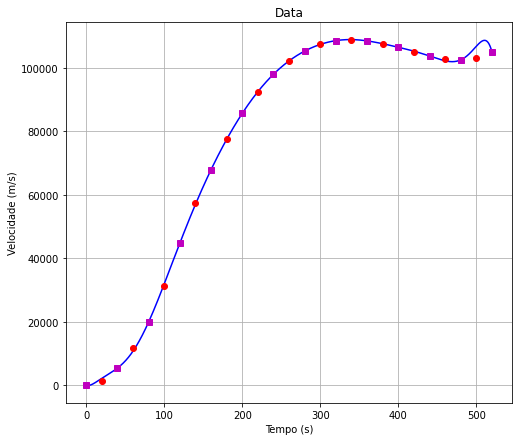

In [134]:
xtarget = np.arange(0, 560, 40)
ytarget = [y[i*2] for i in range(len(xtarget))]

print(xtarget)
print(ytarget)

xLagrange = np.arange(0.0, 520.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i)for i in xLagrange]

firstError = []
for i in range(len(x)):
    firstError.append(abs(Lagrange(xtarget,ytarget,x[i])-y[i]))

print(firstError)
print("Erro total: " +str(np.sum(firstError))) 

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)

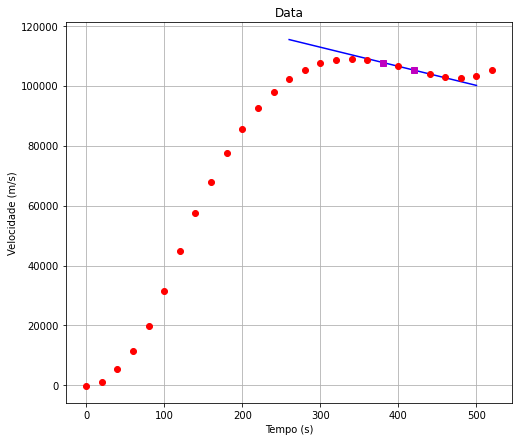

Erro = 123.0


In [122]:
xtarget ,ytarget = getNearPoints(1,x,y,x[20])

xLagrange = np.arange(260, 500.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i) for i in xLagrange]

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)
print("Erro = " + str(abs(Lagrange(xtarget,ytarget,x[20])-y[20])))

In [123]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(1,x,y,x[i])
    yLagrange = Lagrange(xtarget,ytarget,x[i])
    error = abs(yLagrange - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[1252.0, 1440.5, 1053.5, 1007.5, 1642.5, 887.0, 322.0, 1086.5, 452.5, 707.5, 679.0, 648.0, 613.0, 638.5, 446.0, 479.0, 423.5, 361.0, 227.0, 149.0, 123.0, 15.0, 199.5, 356.5, 500.0, 513.5, 1772.0]
Erro total: 17995.0


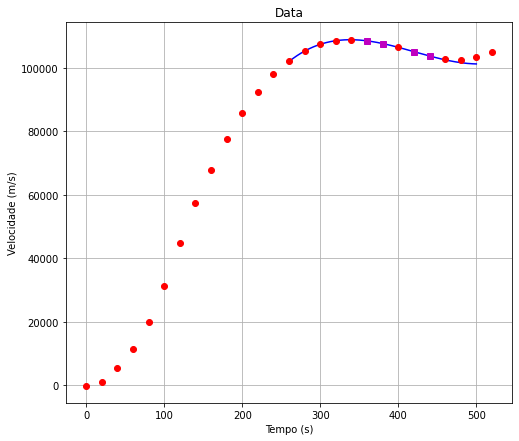

Erro = 37.333333333343035


In [124]:
xtarget ,ytarget = getNearPoints(2,x,y,x[20])

xLagrange = np.arange(260, 500.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i) for i in xLagrange]

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)
print("Erro = " + str(abs(Lagrange(xtarget,ytarget,x[20])-y[20])))

In [125]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(2,x,y,x[i])
    yLagrange = Lagrange(xtarget,ytarget,x[i])
    error = abs(yLagrange - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[2881.0, 258.0, 113.66666666666788, 227.0, 463.5, 151.16666666666424, 148.16666666667152, 466.16666666666424, 296.3333333333285, 94.5, 0.8333333333430346, 1.3333333333139308, 20.166666666656965, 72.66666666665697, 75.16666666665697, 29.5, 2.3333333333430346, 23.833333333328483, 18.666666666656965, 17.333333333343035, 37.333333333343035, 15.5, 9.166666666656965, 4.5, 43.33333333332848, 9.0, 1027.0]
Erro total: 6507.166666666624


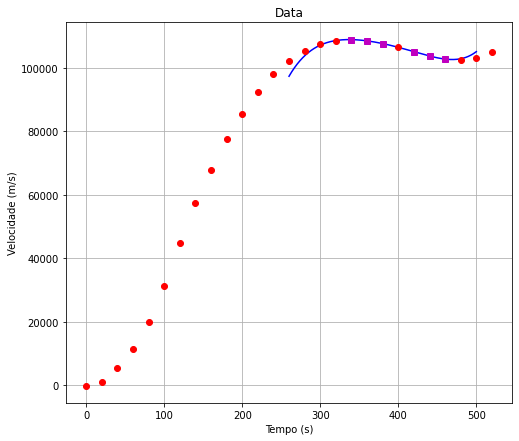

Erro = 22.949999999982538


In [126]:
xtarget ,ytarget = getNearPoints(3,x,y,x[20])

xLagrange = np.arange(260, 500.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i) for i in xLagrange]

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)
print("Erro = " + str(abs(Lagrange(xtarget,ytarget,x[20])-y[20])))

In [127]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(3,x,y,x[i])
    yLagrange = Lagrange(xtarget,ytarget,x[i])
    error = abs(yLagrange - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[774.0, 170.5, 68.0, 241.14999999999782, 300.84999999999854, 3.899999999997817, 5.600000000005821, 324.15000000000146, 346.0, 145.35000000000582, 28.25, 6.600000000005821, 34.29999999998836, 72.19999999999709, 75.75000000001455, 39.55000000001746, 14.60000000000582, 19.19999999999709, 13.150000000008731, 16.0, 22.949999999982538, 0.8500000000058208, 8.800000000017462, 13.05000000000291, 23.30000000000291, 65.0, 27.0]
Erro total: 2860.050000000054


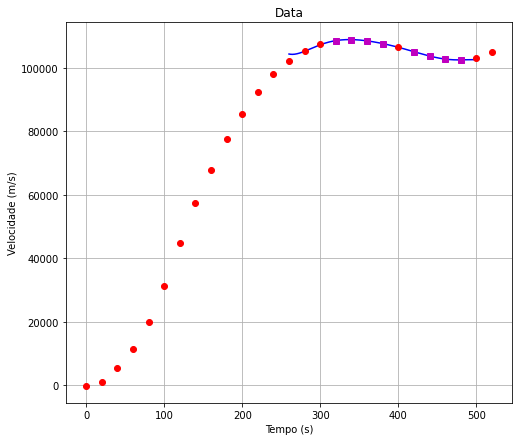

Erro = 17.442857142843422


In [128]:
xtarget ,ytarget = getNearPoints(4,x,y,x[20])

xLagrange = np.arange(260, 500.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i) for i in xLagrange]

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)
print("Erro = " + str(abs(Lagrange(xtarget,ytarget,x[20])-y[20])))

In [129]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(4,x,y,x[i])
    yLagrange = Lagrange(xtarget,ytarget,x[i])
    error = abs(yLagrange - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[682.0, 136.0000000000009, 321.53333333333376, 309.7142857142844, 241.9285714285761, 89.78571428570285, 96.92857142857974, 285.6857142857043, 331.8571428571595, 189.98571428569267, 59.55714285715658, 21.642857142855064, 42.114285714313155, 72.69999999998254, 75.21428571431898, 48.414285714243306, 25.128571428605937, 18.899999999965075, 8.428571428579744, 11.942857142887078, 17.442857142843422, 3.5571428571711294, 9.000000000029104, 12.485714285692666, 17.400000000023283, 46.59999999999127, 260.0]
Erro total: 3435.9476190476926


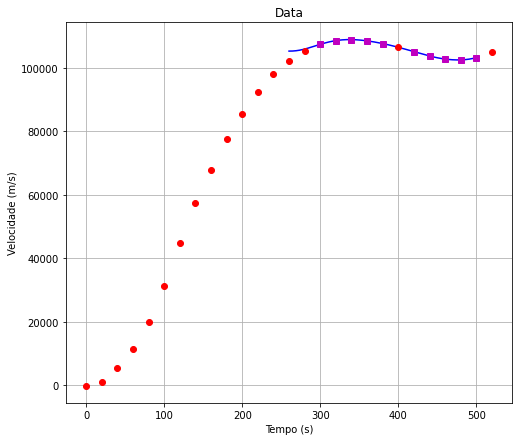

Erro = 13.996031746035442


In [130]:
xtarget ,ytarget = getNearPoints(5,x,y,x[20])

xLagrange = np.arange(260, 500.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i) for i in xLagrange]

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)
print("Erro = " + str(abs(Lagrange(xtarget,ytarget,x[20])-y[20])))

In [131]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(5,x,y,x[i])
    yLagrange = Lagrange(xtarget,ytarget,x[i])
    error = abs(yLagrange - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[680.0, 803.8333333333385, 516.1904761904752, 302.41071428571195, 184.28571428572104, 144.00793650794003, 158.14682539681235, 277.8214285714421, 316.4960317460209, 214.27380952381645, 91.87301587303227, 40.26587301585823, 49.603174603165826, 72.9801587301481, 75.4285714285943, 54.769841269851895, 32.65873015872785, 19.821428571420256, 6.615079365088604, 9.138888888890506, 13.996031746035442, 4.321428571420256, 3.0238095238164533, 11.249999999970896, 20.80952380951203, 43.49999999994179, 233.0]
Erro total: 4380.521825396753


# Newton

In [132]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

[0.0, 903.1306689975463, 0.0, 907.6487072707896, 0.0, 462.4172667265084, 0.0, 451.8417695760654, 0.0, 27.485657334313146, 0.0, 27.399776577964076, 0.0, 74.16767227643868, 0.0, 23.437466025381582, 0.0, 8.8380492926226, 0.0, 43.041455149577814, 0.0, 153.97562968732382, 0.0, 552.2913106679916, 0.0, 3551.493634580809, 0.0]
Erro total: 7187.169064163332


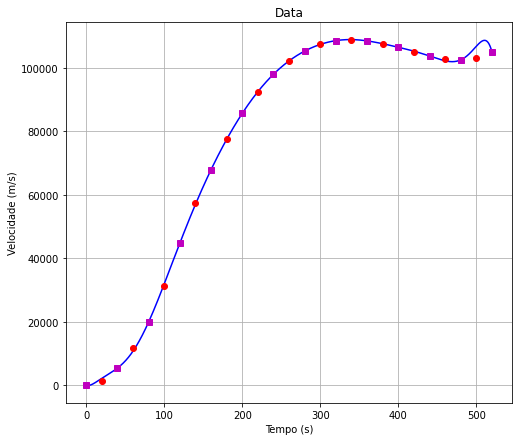

In [142]:
xtarget = np.arange(0, 560, 40)
ytarget = [y[i*2] for i in range(len(xtarget))]
# get the divided difference coef
a_s = divided_diff(xtarget, ytarget)[0, :]

# evaluate on new data points
x_new = np.arange(0, 520.1, 0.1)
y_new = newton_poly(a_s, xtarget, x_new)

firstError = []
for i in range(len(x)):
    firstError.append(abs(Lagrange(xtarget,ytarget,x[i])-y[i]))

print(firstError)
print("Erro total: " +str(np.sum(firstError))) 

Plotpattern(x,y,xtarget,ytarget,x_new,y_new)

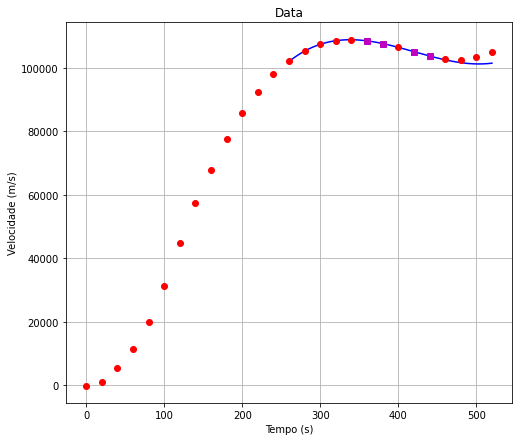

Erro = 37.33333333332848


In [143]:
xtarget ,ytarget = getNearPoints(2,x,y,x[20])
# get the divided difference coef
a_s = divided_diff(xtarget, ytarget)[0, :]

# evaluate on new data points
x_new = np.arange(260, 520.1, 0.1)
y_new = newton_poly(a_s, xtarget, x_new)


Plotpattern(x,y,xtarget,ytarget,x_new,y_new)
print("Erro = " + str(abs(newton_poly(a_s, xtarget, x[20])-y[20])))

In [147]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(2,x,y,x[i])
    a_s = divided_diff(xtarget, ytarget)[0, :]
    yNewton = newton_poly(a_s, xtarget, x[i])
    error = abs(yNewton - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[2881.0, 258.0, 113.66666666666697, 227.0, 463.5, 151.16666666666788, 148.16666666666424, 466.1666666666715, 296.33333333334303, 94.5, 0.8333333333430346, 1.3333333333284827, 20.166666666671517, 72.66666666667152, 75.16666666667152, 29.5, 2.3333333333284827, 23.833333333328483, 18.666666666671517, 17.333333333328483, 37.33333333332848, 15.5, 9.166666666671517, 4.5, 43.33333333332848, 9.0, 1027.0]
Erro total: 6507.166666666685


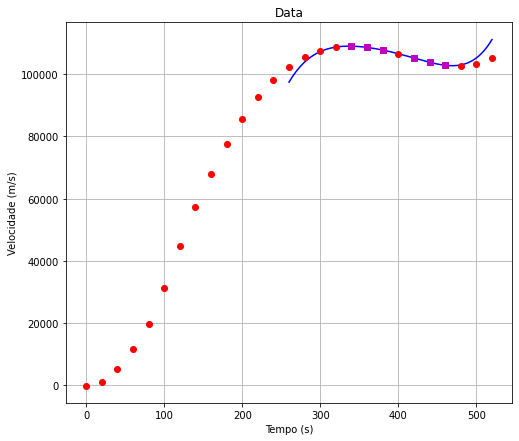

Erro = 22.94999999999709


In [148]:
xtarget ,ytarget = getNearPoints(3,x,y,x[20])
# get the divided difference coef
a_s = divided_diff(xtarget, ytarget)[0, :]

# evaluate on new data points
x_new = np.arange(260, 520.1, 0.1)
y_new = newton_poly(a_s, xtarget, x_new)


Plotpattern(x,y,xtarget,ytarget,x_new,y_new)
print("Erro = " + str(abs(newton_poly(a_s, xtarget, x[20])-y[20])))

In [150]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(3,x,y,x[i])
    a_s = divided_diff(xtarget, ytarget)[0, :]
    yNewton = newton_poly(a_s, xtarget, x[i])
    error = abs(yNewton - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[774.0000000000002, 170.5, 68.00000000000091, 241.15000000000146, 300.8500000000022, 3.899999999997817, 5.599999999998545, 324.15000000000146, 346.0, 145.35000000000582, 28.25, 6.600000000005821, 34.30000000000291, 72.19999999999709, 75.75, 39.55000000000291, 14.60000000000582, 19.19999999999709, 13.14999999999418, 16.0, 22.94999999999709, 0.8500000000058208, 8.80000000000291, 13.05000000000291, 23.30000000000291, 65.0, 27.0]
Erro total: 2860.0500000000256


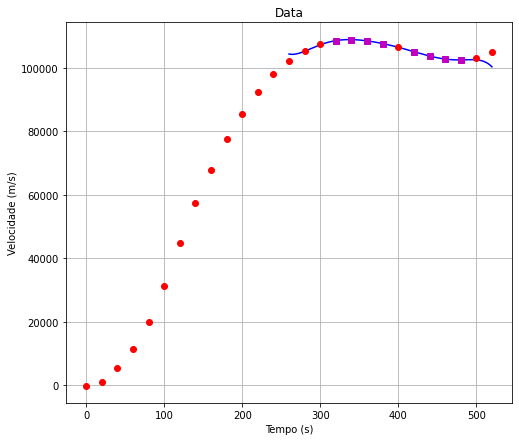

Erro = 17.442857142857974


In [152]:
xtarget ,ytarget = getNearPoints(4,x,y,x[20])
# get the divided difference coef
a_s = divided_diff(xtarget, ytarget)[0, :]

# evaluate on new data points
x_new = np.arange(260, 520.1, 0.1)
y_new = newton_poly(a_s, xtarget, x_new)


Plotpattern(x,y,xtarget,ytarget,x_new,y_new)
print("Erro = " + str(abs(newton_poly(a_s, xtarget, x[20])-y[20])))

In [154]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(4,x,y,x[i])
    a_s = divided_diff(xtarget, ytarget)[0, :]
    yNewton = newton_poly(a_s, xtarget, x[i])
    error = abs(yNewton - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[681.9999999999998, 136.0, 321.53333333333285, 309.71428571428623, 241.92857142857247, 89.7857142857174, 96.92857142857247, 285.6857142857116, 331.85714285714494, 189.98571428570722, 59.557142857142026, 21.642857142855064, 42.11428571428405, 72.69999999999709, 75.21428571428987, 48.41428571428696, 25.128571428576834, 18.89999999999418, 8.428571428565192, 11.942857142857974, 17.442857142857974, 3.5571428571420256, 9.0, 12.485714285707218, 17.39999999999418, 46.60000000000582, 260.0]
Erro total: 3435.9476190476016


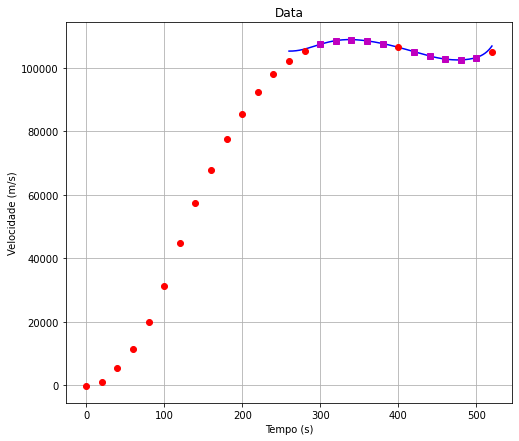

Erro = 13.996031746035442


In [156]:
xtarget ,ytarget = getNearPoints(5,x,y,x[20])
# get the divided difference coef
a_s = divided_diff(xtarget, ytarget)[0, :]

# evaluate on new data points
x_new = np.arange(260, 520.1, 0.1)
y_new = newton_poly(a_s, xtarget, x_new)


Plotpattern(x,y,xtarget,ytarget,x_new,y_new)
print("Erro = " + str(abs(newton_poly(a_s, xtarget, x[20])-y[20])))

In [155]:
errorSum = []
for i in range(len(x)):
    xtarget ,ytarget = getNearPoints(5,x,y,x[i])
    a_s = divided_diff(xtarget, ytarget)[0, :]
    yNewton = newton_poly(a_s, xtarget, x[i])
    error = abs(yNewton - y[i])
    errorSum.append(error)

print(errorSum)

print("Erro total: " + str(np.sum(errorSum)))

[680.0000000000007, 803.8333333333334, 516.1904761904761, 302.4107142857156, 184.2857142857174, 144.00793650793275, 158.14682539681962, 277.82142857142026, 316.49603174603544, 214.27380952381645, 91.87301587301772, 40.265873015872785, 49.603174603165826, 72.9801587301481, 75.42857142856519, 54.76984126983734, 32.65873015872785, 19.821428571434808, 6.6150793650740525, 9.138888888890506, 13.996031746035442, 4.321428571434808, 3.0238095238164533, 11.25, 20.80952380952658, 43.5, 233.0]
Erro total: 4380.521825396815


## Lagrage v.s Newton

Método    | Erro total
--------- | ------
Lagrange Alternado | 7187.169064163332
Lagrange 1 | 17995.0
Lagrange 2 | 6507.166666666624
Lagrange 3 | 2860.0500000000256
Lagrange 4 | 3435.9476190476926
Lagrange 5 | 4380.521825396753